In [76]:
%pip install kagglehub # this is how you can import modules/libraries

Note: you may need to restart the kernel to use updated packages.


In [77]:
import kagglehub # we are using an api to import kagglehub's dataset

path = kagglehub.dataset_download("jafarhussain786/human-emotionshappy-faces")

path

'/Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1'

In [78]:
%pip install opencv-python ipython

Note: you may need to restart the kernel to use updated packages.


In [79]:
'''
Resizing first: Ensures that all subsequent operations work on a consistent image size.
Setting the background to black next: Helps to clean up the image before grayscaling, making it more effective.
Grayscaling last: Keeps it optional, allowing for flexibility based on your needs.
'''

'\nResizing first: Ensures that all subsequent operations work on a consistent image size.\nSetting the background to black next: Helps to clean up the image before grayscaling, making it more effective.\nGrayscaling last: Keeps it optional, allowing for flexibility based on your needs.\n'

In [80]:
import cv2
import numpy as np

def resize_image(image, target_size=(224, 224)):
    """
    Resize the image to the target size while maintaining aspect ratio.
    Adds padding to ensure the output size is consistent.
    """
    h, w = image.shape[:2]
    scale = min(target_size[0] / h, target_size[1] / w)
    new_w = int(w * scale)
    new_h = int(h * scale)

    resized_image = cv2.resize(image, (new_w, new_h))

    # Add padding to make it the target size
    top = (target_size[0] - new_h) // 2
    left = (target_size[1] - new_w) // 2

    # Create a black canvas and place the resized image on it
    canvas = np.zeros((target_size[0], target_size[1], 3), dtype=np.uint8)
    canvas[top:top+new_h, left:left+new_w] = resized_image

    return canvas

def set_black_background(image, threshold=20):
    """
    Set the background to black by thresholding the image.
    Pixels with intensity below the threshold will be set to black.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY_INV)

    # Use the mask to set the background to black
    image[mask == 255] = [0, 0, 0]
    return image

def preprocess_image(image, grayscale=True, target_size=(224, 224)):
    """
    Preprocess the image by resizing, setting the background to black, and converting to grayscale.
    """
    image = resize_image(image, target_size)

    image = set_black_background(image)

    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return image


In [81]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [86]:
import os
from IPython.display import display, Image
from PIL import Image as PILImage
import io

image_files = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg'))]
num_images_to_display = 7

Using image 1 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/images26.jpg
Original Image 1:


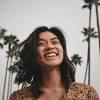

Image 1 after ETL:


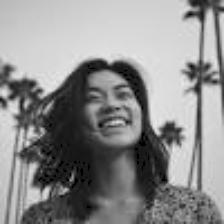

Using image 2 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/images32.jpg
Original Image 2:


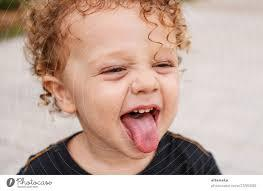

Image 2 after ETL:


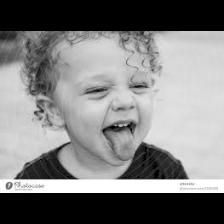

Using image 3 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/n-with-happy-face-expression-people-portraits-isolated-in-neutral-bac-W1FJB7.jpg
Original Image 3:


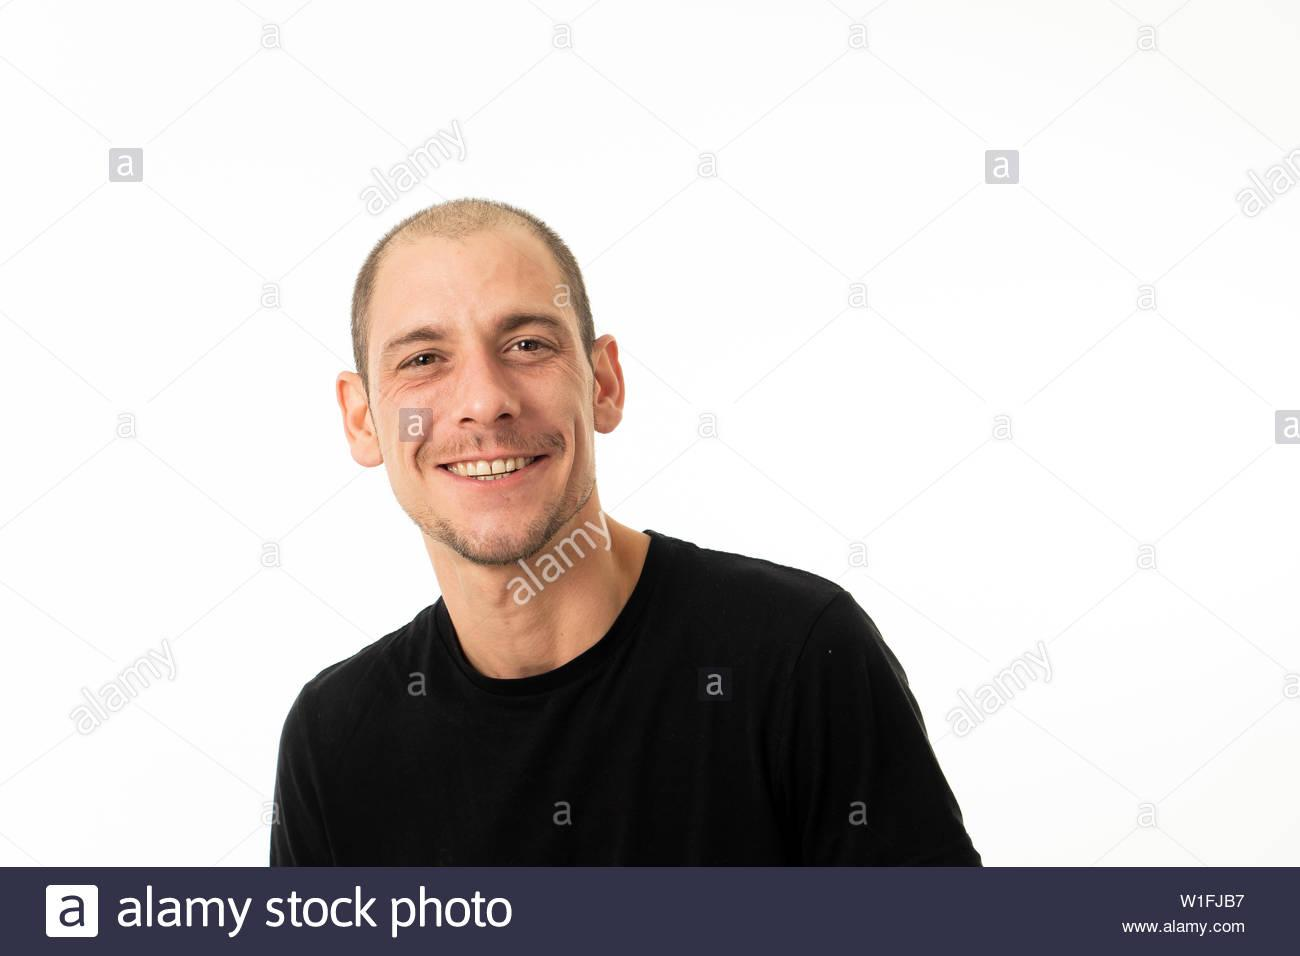

Image 3 after ETL:


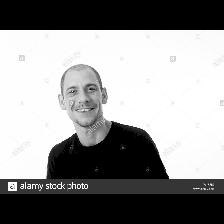

Using image 4 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/image22.jpeg
Original Image 4:


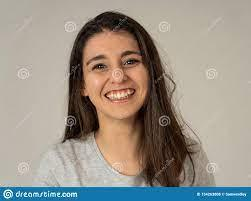

Image 4 after ETL:


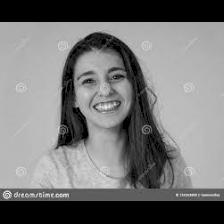

Using image 5 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/500_F_246149573_1dbnEopMZjSflWG4ZvojXhVVV8cTewTW.jpg
Original Image 5:


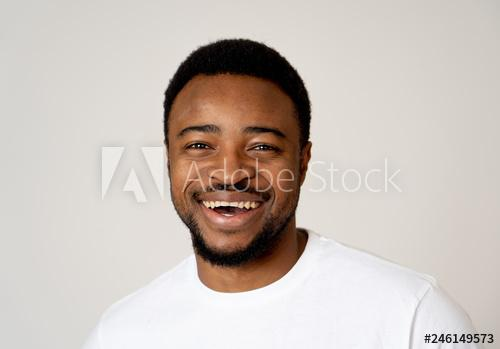

Image 5 after ETL:


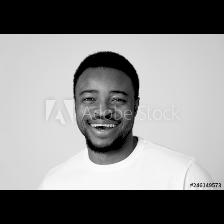

In [83]:
def show_images(num_images=1):
    for i, image_file in enumerate(image_files[:num_images]):
        image_path = os.path.join(path, image_file)
        print(f"Using image {i+1} for testing: {image_path}")

        image = cv2.imread(image_path)

        original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        processed_image = preprocess_image(image)

        processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

        original_img_pil = PILImage.fromarray(original_image_rgb)
        buf_original = io.BytesIO()
        original_img_pil.save(buf_original, format='JPEG')
        buf_original.seek(0)

        processed_img_pil = PILImage.fromarray(processed_image_rgb)
        buf_processed = io.BytesIO()
        processed_img_pil.save(buf_processed, format='JPEG')
        buf_processed.seek(0)

        print(f"Original Image {i+1}:")
        display(Image(data=buf_original.getvalue()))

        print(f"Image {i+1} after ETL:")
        display(Image(data=buf_processed.getvalue()))

show_images(num_images_to_display)


In [87]:
output_dir = "processed_images"
os.makedirs(output_dir, exist_ok=True)

def save_processed_images(num_images=1):
    for i, image_file in enumerate(image_files[:num_images]):
        image_path = os.path.join(path, image_file)
        print(f"Processing image {i+1}: {image_path}")

        image = cv2.imread(image_path)

        processed_image = preprocess_image(image)

        processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

        output_file_path = os.path.join(output_dir, f"processed_{i+1}.jpg")

        PILImage.fromarray(processed_image_rgb).save(output_file_path)

        print(f"Processed image saved to: {output_file_path}")

save_processed_images(num_images_to_display)


Processing image 1: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/images26.jpg
Processed image saved to: processed_images/processed_1.jpg
Processing image 2: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/images32.jpg
Processed image saved to: processed_images/processed_2.jpg
Processing image 3: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/n-with-happy-face-expression-people-portraits-isolated-in-neutral-bac-W1FJB7.jpg
Processed image saved to: processed_images/processed_3.jpg
Processing image 4: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/image22.jpeg
Processed image saved to: processed_images/processed_4.jpg
Processing image 5: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/500_F_246149573_1dbnEopMZjSflWG4ZvojXhVVV8cTewTW.jpg
Processed image saved to: processed_image